### KNN

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as p
from sklearn.model_selection import train_test_split

In [2]:
dataset = pd.read_csv('wifi_localization.csv', sep='\t' , header=0)
dataset

,atb1,atb2,atb3,atb4,atb5,atr6,atb7,lable
0,-64,-56,-61,-66,-71,-82,-81,1
1,-68,-57,-61,-65,-71,-85,-85,1
2,-63,-60,-60,-67,-76,-85,-84,1
3,-61,-60,-68,-62,-77,-90,-80,1
4,-63,-65,-60,-63,-77,-81,-87,1
...,...,...,...,...,...,...,...,...
1995,-59,-59,-48,-66,-50,-86,-94,4
1996,-59,-56,-50,-62,-47,-87,-90,4
1997,-62,-59,-46,-65,-45,-87,-88,4
1998,-62,-58,-52,-61,-41,-90,-85,4


      atb1  atb2  atb3  atb4  atb5  atr6  atb7
993    -45   -52   -59   -43   -71   -74   -79
1156   -51   -53   -52   -55   -68   -78   -91
615    -41   -57   -64   -42   -74   -69   -70
703    -37   -61   -55   -40   -63   -70   -67
1130   -51   -57   -51   -51   -65   -80   -80
...    ...   ...   ...   ...   ...   ...   ...
1016   -48   -56   -50   -45   -61   -80   -80
165    -62   -55   -58   -68   -69   -83   -88
7      -61   -63   -58   -66   -74   -87   -82
219    -62   -49   -56   -63   -67   -78   -80
1350   -52   -56   -52   -50   -65   -86   -84

[1400 rows x 7 columns]
When K = 1 neighnors , KNN test accuracy: 0.9866666666666667
When K = 1 neighnors , KNN train accuracy: 1.0
Best test score is 0.9916666666666667 , K = 3
Best train score is 1.0 , K = 1


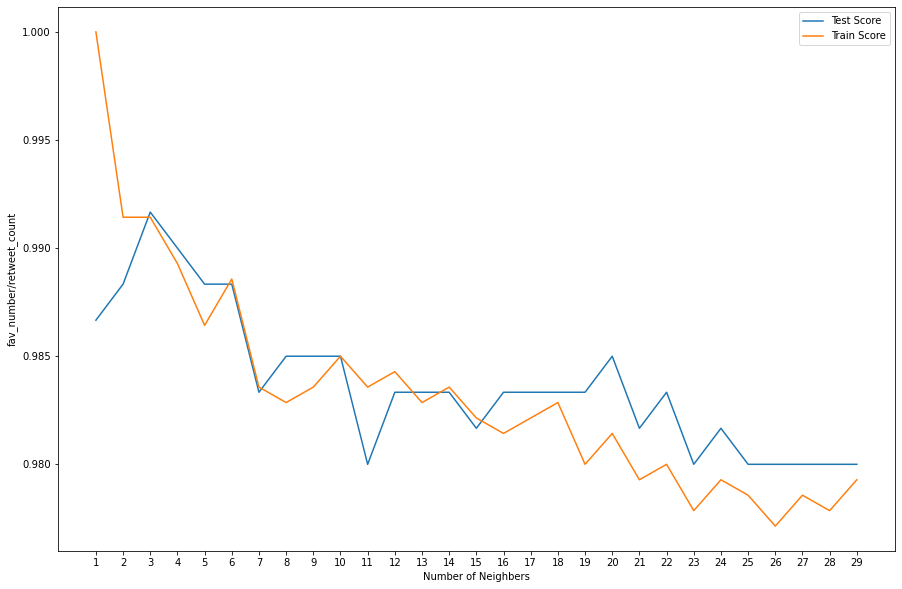

In [3]:


#dataset.head()
#dataset.shape
#dataset.info()
#print(dataset['t'])
#y=(dataset['t'])
#x=dataset[['a','b','c','d','e','f','g','h','i','j','k','l']]
#print(x)
#print(y)
#dataset.hist(bins=50, figsize=(20,15))
#p.show()
train_set, test_set = train_test_split(dataset, test_size=0.3, random_state=40)


train_set_att = train_set.drop(['lable'], axis=1)
print(train_set_att)
train_set_t = train_set['lable']
test_set_att = test_set.drop(['lable'], axis=1)
test_set_t = test_set['lable']
from sklearn.neighbors import KNeighborsClassifier
K = 1
knn = KNeighborsClassifier(n_neighbors=K)
knn.fit(train_set_att, train_set_t)
print("When K = {} neighnors , KNN test accuracy: {}".format(K, knn.score(test_set_att,test_set_t)))
print("When K = {} neighnors , KNN train accuracy: {}".format(K, knn.score(train_set_att, train_set_t)))

ran = np.arange(1,30)
train_list = []
test_list = []
for i,each in enumerate(ran):
    knn = KNeighborsClassifier(n_neighbors=each)
    knn.fit(train_set_att, train_set_t)
    test_list.append(knn.score(test_set_att,test_set_t ))
    train_list.append(knn.score(train_set_att,train_set_t ))
    
p.figure(figsize=[15,10])
p.plot(ran,test_list,label='Test Score')
p.plot(ran,train_list,label = 'Train Score')
p.xlabel('Number of Neighbers')
p.ylabel('fav_number/retweet_count')
p.xticks(ran)
p.legend()
print("Best test score is {} , K = {}".format(np.max(test_list), test_list.index(np.max(test_list))+1))
print("Best train score is {} , K = {}".format(np.max(train_list), train_list.index(np.max(train_list))+1))
